### LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"

#### Rajat Garg 
#### Task 2:- Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [4]:
data.shape

(2035, 8)

In [5]:
data.sort_values(by='Date',inplace=True)

In [6]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
hig=data.Close

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
hig=scaler.fit_transform(np.array(hig).reshape(-1,1))

In [9]:
train_size=int(len(hig)*0.7)
test_size=len(hig) - train_size

train_data , test_data = hig[ 0 : train_size,: ] , hig[ train_size : len(hig),:1 ]

In [10]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
time_step=100
x_train , y_train =create_dataset(train_data,time_step)
x_test , y_test = create_dataset(test_data,time_step)
print(x_train.shape , y_train.shape)

(1323, 100) (1323,)


In [12]:
print(x_test.shape , y_test.shape)

(510, 100) (510,)


In [13]:
!pip install tensorflow



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True , input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error')

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=80 , batch_size=64)

Epoch 1/80
21/21 [==============================] - 11s 200ms/step - loss: 0.0064 - val_loss: 0.0142
Epoch 2/80
21/21 [==============================] - 4s 168ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 3/80
21/21 [==============================] - 3s 156ms/step - loss: 0.0019 - val_loss: 0.0136
Epoch 4/80
21/21 [==============================] - 3s 148ms/step - loss: 0.0020 - val_loss: 0.0055
Epoch 5/80
21/21 [==============================] - 3s 148ms/step - loss: 0.0018 - val_loss: 0.0322
Epoch 6/80
21/21 [==============================] - 4s 171ms/step - loss: 0.0014 - val_loss: 0.0092
Epoch 7/80
21/21 [==============================] - 4s 174ms/step - loss: 0.0012 - val_loss: 0.0317
Epoch 8/80
21/21 [==============================] - 4s 173ms/step - loss: 0.0015 - val_loss: 0.0088
Epoch 9/80
21/21 [==============================] - 4s 173ms/step - loss: 9.9802e-04 - val_loss: 0.0096
Epoch 10/80
21/21 [==============================] - 4s 174ms/step - loss: 0.0010 - val_loss: 0

In [20]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [21]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

16/16 [==============================] - 1s 50ms/step


In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))


139.29943137087938
201.65631989218417


In [24]:
look_back=100
trainPredictPlot = np.empty_like(hig)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(hig)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(hig)-1, :] = test_predict

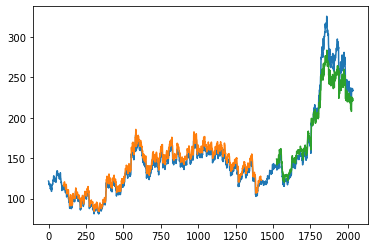

In [25]:
plt.plot(scaler.inverse_transform(hig))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
x_input=test_data[511:].reshape(1,-1)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [29]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.57564336]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

9 day output [[0.4474815]]
10 day input [0.67892157 0.69138072 0.70894608 0.72263072 0.73406863 0.72120098
 0.74979575 0.7689951  0.74468954 0.7120098  0.74673203 0.75490196
 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582
 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183
 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915
 0.81719771 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667
 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935
 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758
 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948
 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098
 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745
 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974
 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464
 0.55167484 0.57883987 0.625      0.63582516 0.62949346 0.62888072
 0.62765523 0.62234477 

17 day output [[0.4268998]]
18 day input [0.74468954 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392
 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765
 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791
 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333
 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523
 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951
 0.66319444 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098
 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013
 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882
 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634
 0.62254902 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908
 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987
 0.625      0.63582516 0.62949346 0.62888072 0.62765523 0.62234477
 0.63378268 0.62622549 0.62214052 0.62418301 0.57564336 0.52617645
 0.49178025 0.4701241  

26 day output [[0.41749918]]
27 day input [0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052
 0.62418301 0.57564336 0.52617645 0.49178025 0.4701241  0.45843795
 0.45292443 0.45062676 0.44959137 0.44871444 0.44748151 0.44573402
 0.44350085 0.440894

In [32]:
new_day=np.arange(1,101)
pred_day=np.arange(101,131)

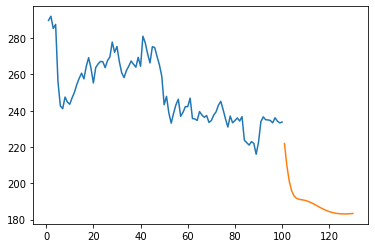

In [33]:
plt.plot(new_day,scaler.inverse_transform(hig[1935:]))
plt.plot(pred_day,scaler.inverse_transform(lst_output))

<function matplotlib.pyplot.show(close=None, block=None)>

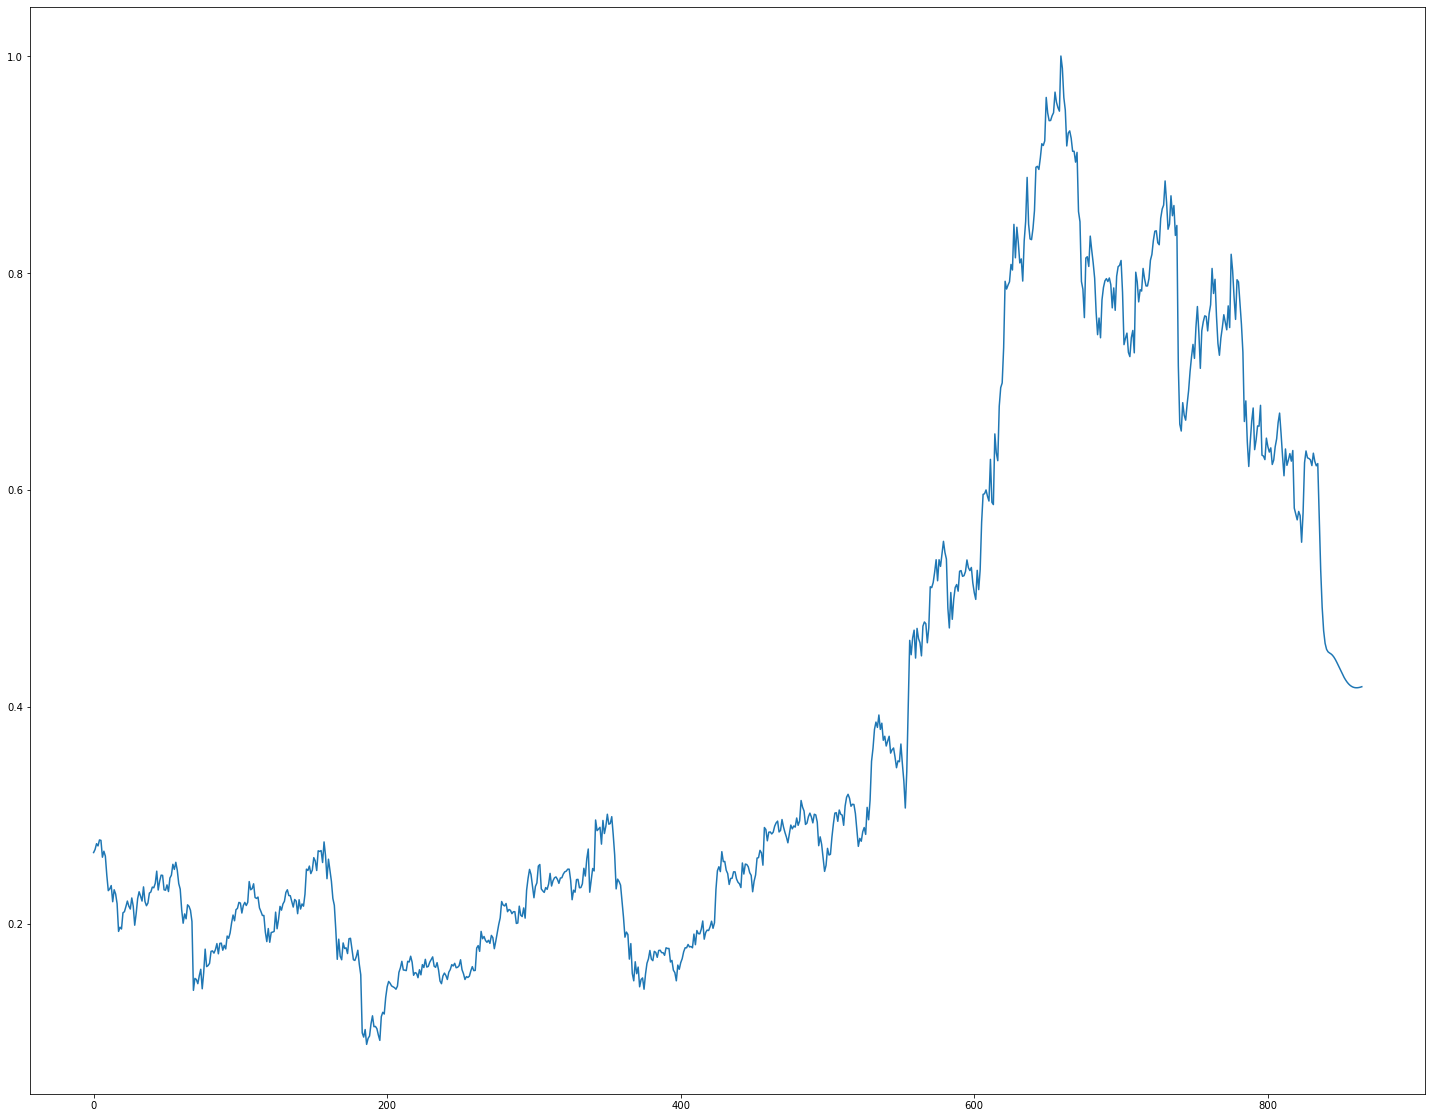

In [35]:
main_output=hig.tolist()
main_output.extend(lst_output)
plt.figure(figsize=(25, 20))
plt.plot(main_output[1200:])
plt.show


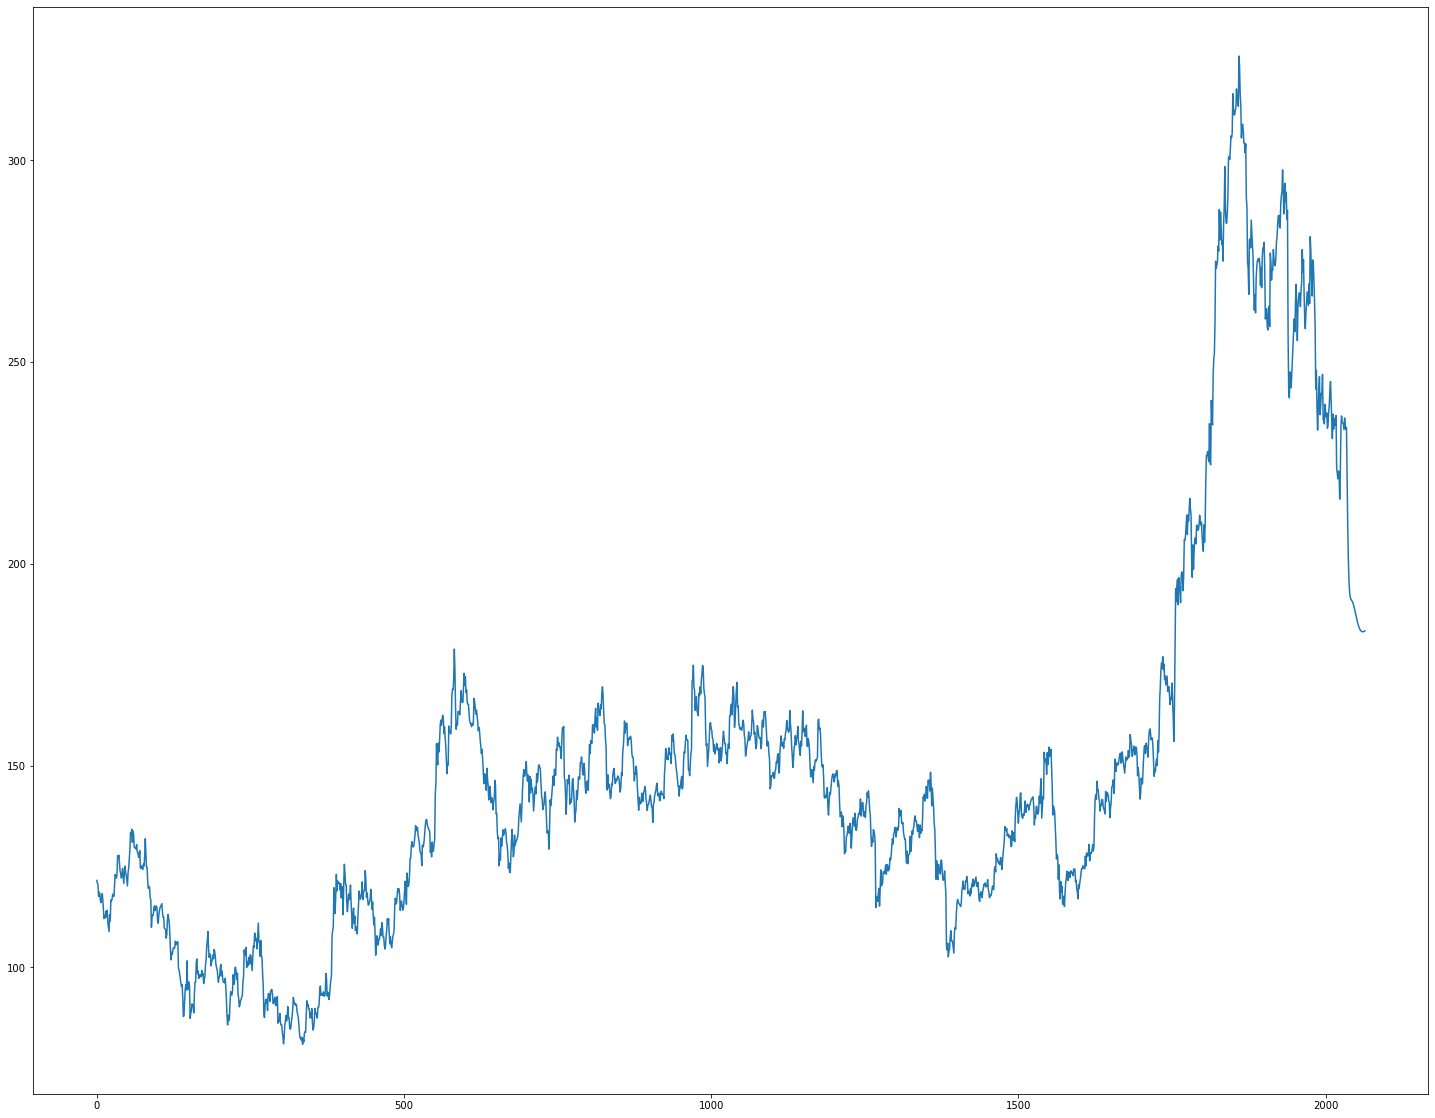

In [36]:
main_output=scaler.inverse_transform(main_output).tolist()
plt.figure(figsize=(25, 20))
plt.plot(main_output)

#### THANK YOU